In [1]:
import pandas as pd
df = pd.read_csv('性格数据1.csv')
df0=df
df

country  EXT  EST  AGR  CSN  OPN
0            GB   46   24   39   32   45
1            MY   20   25   44   37   35
2            GB   25   26   42   34   41
3            GB   26   29   38   25   39
4            KE   29   19   46   48   48
...         ...  ...  ...  ...  ...  ...
1015336      US   34   33   38   31   33
1015337      US   32   44   39   28   45
1015338      US   39   29   35   19   48
1015339      US   22   35   37   38   41
1015340      US   39   29   42   28   47

[1015341 rows x 6 columns]

In [2]:
df1 = df.groupby('country').mean()
df1['count'] = df.groupby('country').size()
df1 = df1.reset_index()
df1

country        EXT        EST        AGR        CSN        OPN  count
0        AD  29.705882  28.411765  38.294118  33.470588  38.705882     17
1        AE  30.302842  31.246651  37.621692  33.916367  37.189154   3061
2        AF  31.018519  28.259259  36.222222  34.240741  36.500000     54
3        AG  27.333333  30.500000  35.541667  33.625000  39.916667     24
4        AI  27.750000  30.250000  42.500000  36.250000  42.500000      4
..      ...        ...        ...        ...        ...        ...    ...
218      XK  28.285714  30.000000  36.000000  28.857143  37.714286      7
219      YE  30.785714  32.928571  35.071429  32.785714  37.642857     14
220      ZA  29.333511  30.138363  37.964543  34.893628  39.810717   3751
221      ZM  27.081633  28.653061  36.775510  34.275510  38.622449     98
222      ZW  28.155340  27.922330  37.854369  35.980583  40.048544    103

[223 rows x 7 columns]

In [3]:
import pycountry
a2_to_a3 = {i.alpha_2: i.alpha_3 for i in pycountry.countries}
# 定义一个函数来进行转换
def convert_alpha2_to_alpha3(alpha2):
    return a2_to_a3.get(alpha2, None)

# 新增一列ctr，并应用转换函数
df1['ctr'] = df1['country'].apply(convert_alpha2_to_alpha3)
df0['ctr'] = df0['country'].apply(convert_alpha2_to_alpha3)
df1

country        EXT        EST        AGR        CSN        OPN  count  \
0        AD  29.705882  28.411765  38.294118  33.470588  38.705882     17   
1        AE  30.302842  31.246651  37.621692  33.916367  37.189154   3061   
2        AF  31.018519  28.259259  36.222222  34.240741  36.500000     54   
3        AG  27.333333  30.500000  35.541667  33.625000  39.916667     24   
4        AI  27.750000  30.250000  42.500000  36.250000  42.500000      4   
..      ...        ...        ...        ...        ...        ...    ...   
218      XK  28.285714  30.000000  36.000000  28.857143  37.714286      7   
219      YE  30.785714  32.928571  35.071429  32.785714  37.642857     14   
220      ZA  29.333511  30.138363  37.964543  34.893628  39.810717   3751   
221      ZM  27.081633  28.653061  36.775510  34.275510  38.622449     98   
222      ZW  28.155340  27.922330  37.854369  35.980583  40.048544    103   

      ctr  
0     AND  
1     ARE  
2     AFG  
3     ATG  
4     AIA  
..    ...  
218  None  
219   YEM  
220   ZAF  
221   ZMB  
222   ZWE  

[223 rows x 8 columns]

In [4]:
# 查找ctr列中的空值，并打印对应的行
null_ctr_rows = df1[df1['ctr'].isna()]
null_ctr_count = null_ctr_rows.shape[0]

print(f'Total number of rows with null values in "ctr" column: {null_ctr_count}')
null_ctr_rows

Total number of rows with null values in "ctr" column: 2


country        EXT        EST        AGR        CSN        OPN  count  \
152    NONE  29.012165  30.831949  36.942818  33.385708  38.446241  13728   
218      XK  28.285714  30.000000  36.000000  28.857143  37.714286      7   

      ctr  
152  None  
218  None

In [5]:
df1 = df1.dropna(subset=['ctr'])
df0 = df0.dropna(subset=['ctr'])
df1

country        EXT        EST        AGR        CSN        OPN  count  ctr
0        AD  29.705882  28.411765  38.294118  33.470588  38.705882     17  AND
1        AE  30.302842  31.246651  37.621692  33.916367  37.189154   3061  ARE
2        AF  31.018519  28.259259  36.222222  34.240741  36.500000     54  AFG
3        AG  27.333333  30.500000  35.541667  33.625000  39.916667     24  ATG
4        AI  27.750000  30.250000  42.500000  36.250000  42.500000      4  AIA
..      ...        ...        ...        ...        ...        ...    ...  ...
217      WS  27.636364  33.727273  37.181818  35.727273  38.090909     11  WSM
219      YE  30.785714  32.928571  35.071429  32.785714  37.642857     14  YEM
220      ZA  29.333511  30.138363  37.964543  34.893628  39.810717   3751  ZAF
221      ZM  27.081633  28.653061  36.775510  34.275510  38.622449     98  ZMB
222      ZW  28.155340  27.922330  37.854369  35.980583  40.048544    103  ZWE

[221 rows x 8 columns]

In [6]:
culture = pd.read_csv("文化国家匹配0.csv")

# dfc = culture.dropna(subset=['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr','ctr1'])
dfc = culture.dropna(subset=['ctr1'])
dfc= dfc.drop(columns=['Unnamed: 0'])
dfc


ctr    country   pdi   idv   mas    uai  ltowvs    ivr  \
2    ALB    Albania   NaN   NaN   NaN    NaN    61.0   15.0   
3    ALG    Algeria   NaN   NaN   NaN    NaN    26.0   32.0   
4    AND    Andorra   NaN   NaN   NaN    NaN     NaN   65.0   
6    ARG  Argentina  49.0  46.0  56.0   86.0    20.0   62.0   
7    ARM    Armenia   NaN   NaN   NaN    NaN    61.0    NaN   
..   ...        ...   ...   ...   ...    ...     ...    ...   
106  URU    Uruguay  61.0  36.0  38.0  100.0    26.0   53.0   
107  VEN  Venezuela  81.0  12.0  73.0   76.0    16.0  100.0   
108  VIE    Vietnam  70.0  20.0  40.0   30.0    57.0   35.0   
109  ZAM     Zambia   NaN   NaN   NaN    NaN    30.0   42.0   
110  ZIM   Zimbabwe   NaN   NaN   NaN    NaN    15.0   28.0   

                              country1 ctr1  
2                              Albania  ALB  
3                                  NaN  DZA  
4                              Andorra  AND  
6                            Argentina  ARG  
7                              Armenia  ARM  
..                                 ...  ...  
106                                NaN  URY  
107  Venezuela, Bolivarian Republic of  VEN  
108                                NaN  VNM  
109                                NaN  ZMB  
110                                NaN  ZWE  

[99 rows x 10 columns]

In [7]:
null_counts = dfc.isnull().sum()
null_counts

ctr          0
country      0
pdi         31
idv         31
mas         31
uai         31
ltowvs       9
ivr          8
country1    44
ctr1         0
dtype: int64

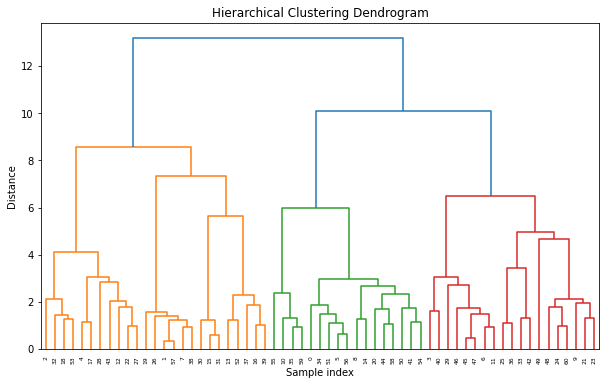

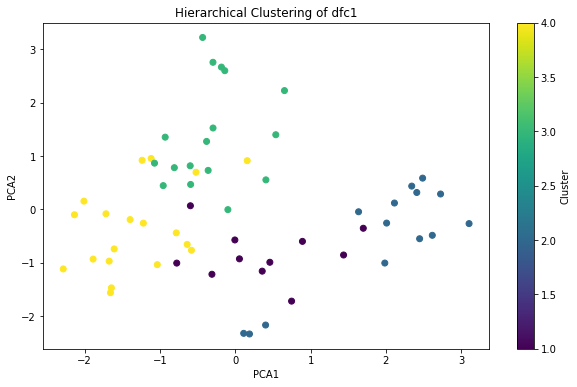

pdi                    idv                    mas              \
              mean         var       mean         var       mean         var   
cluster                                                                        
1        48.000000  301.200000  65.090909  105.490909  66.909091  253.090909   
2        34.214286   57.565934  74.714286  110.681319  35.285714  595.450549   
3        63.823529   82.654412  29.705882  187.720588  46.588235  219.132353   
4        78.105263  201.988304  29.105263  132.543860  51.473684  273.818713   

               uai                 ltowvs                    ivr              
              mean         var       mean         var       mean         var  
cluster                                                                       
1        78.090909  147.890909  67.363636  201.054545  44.636364  200.454545  
2        47.571429  164.879121  46.571429  439.648352  56.357143  538.247253  
3        85.705882  191.345588  31.000000  168.375000  63.058824  406.558824  
4        57.894737  655.654971  56.421053  512.146199  28.631579  163.467836

In [8]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

dfc1 = culture.dropna(subset=['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr','ctr1'])
dfc1= dfc1.drop(columns=['Unnamed: 0'])

# 选择需要聚类的列
features = ['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr']
X = dfc1[features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 层次聚类
Z = linkage(X_scaled, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 根据距离阈值确定簇（这里可以调类的个数）
dfc1['cluster'] = fcluster(Z, t=4, criterion='maxclust')

# 可视化聚类结果
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
dfc1['pca1'] = principal_components[:, 0]
dfc1['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(dfc1['pca1'], dfc1['pca2'], c=dfc1['cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierarchical Clustering of dfc1')
plt.colorbar(label='Cluster')
plt.show()

grouped_stats = dfc1.groupby('cluster').agg({
    'pdi': ['mean', 'var'],
    'idv': ['mean', 'var'],
    'mas': ['mean', 'var'],
    'uai': ['mean', 'var'],
    'ltowvs': ['mean', 'var'],
    'ivr': ['mean', 'var']
})

# 打印结果
grouped_stats


In [9]:


merged_df=df1.merge(dfc1, how='right', left_on='ctr', right_on='ctr1')
merged_df0=df0.merge(dfc1, how='right', left_on='ctr', right_on='ctr1')
merged_df

country_x        EXT        EST        AGR        CSN        OPN     count  \
0         AR  28.341788  32.142676  36.067850  31.419150  39.660431    3154.0   
1         AU  29.838577  30.166020  37.611953  33.346992  38.123166   50030.0   
2         AT  29.906998  29.845147  36.772912  32.370655  40.542212    2215.0   
3         BD  26.673981  31.752351  36.134796  31.940439  36.109718     319.0   
4         BE  29.956590  30.418672  37.523536  31.902458  38.970188    3824.0   
..       ...        ...        ...        ...        ...        ...       ...   
56        TR  29.356278  32.097544  35.848841  32.890695  39.249741    2891.0   
57        US  29.818118  30.279096  38.157230  34.017163  38.816729  546403.0   
58        UY  28.304843  31.128205  36.267806  31.900285  39.179487     351.0   
59        VE  28.777778  31.273016  35.196825  31.628571  39.408730    1260.0   
60        VN  27.783483  31.393667  35.584938  32.126230  35.958494    2337.0   

   ctr_x ctr_y   country_y  ...   idv   mas    uai  ltowvs    ivr  \
0    ARG   ARG   Argentina  ...  46.0  56.0   86.0    20.0   62.0   
1    AUS   AUL   Australia  ...  90.0  61.0   51.0    21.0   71.0   
2    AUT   AUT     Austria  ...  55.0  79.0   70.0    60.0   63.0   
3    BGD   BAN  Bangladesh  ...  20.0  55.0   60.0    47.0   20.0   
4    BEL   BEL     Belgium  ...  75.0  54.0   94.0    82.0   57.0   
..   ...   ...         ...  ...   ...   ...    ...     ...    ...   
56   TUR   TUR      Turkey  ...  37.0  45.0   85.0    46.0   49.0   
57   USA   USA      U.S.A.  ...  91.0  62.0   46.0    26.0   68.0   
58   URY   URU     Uruguay  ...  36.0  38.0  100.0    26.0   53.0   
59   VEN   VEN   Venezuela  ...  12.0  73.0   76.0    16.0  100.0   
60   VNM   VIE     Vietnam  ...  20.0  40.0   30.0    57.0   35.0   

                             country1 ctr1 cluster      pca1      pca2  
0                           Argentina  ARG       3  0.537877  1.399293  
1                                 NaN  AUS       2  2.487182  0.586111  
2                             Austria  AUT       1  1.699486 -0.353321  
3                                 NaN  BGD       4 -1.716708 -0.082023  
4                             Belgium  BEL       1  0.055203 -0.926559  
..                                ...  ...     ...       ...       ...  
56                            Türkiye  TUR       3 -0.592785  0.467436  
57                      United States  USA       2  2.409620  0.317069  
58                                NaN  URY       3 -0.380991  1.273854  
59  Venezuela, Bolivarian Republic of  VEN       3 -0.433554  3.221945  
60                                NaN  VNM       4 -0.783462 -0.439647  

[61 rows x 21 columns]

In [10]:
merged_df.columns

Index(['country_x', 'EXT', 'EST', 'AGR', 'CSN', 'OPN', 'count', 'ctr_x',
       'ctr_y', 'country_y', 'pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr',
       'country1', 'ctr1', 'cluster', 'pca1', 'pca2'],
      dtype='object')

In [11]:
merged_df = merged_df[['country_x', 'EXT', 'EST', 'AGR', 'CSN', 'OPN','pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr','ctr1', 'cluster']]
merged_df0 = merged_df0[['country_x', 'EXT', 'EST', 'AGR', 'CSN', 'OPN','pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr','ctr1', 'cluster']]


new_column_names = {
    'country_x': 'country',
    'ctr1': 'ctr',
}

# 使用rename方法重命名列
merged_df.rename(columns=new_column_names, inplace=True)
merged_df0.rename(columns=new_column_names, inplace=True)

merged_df

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


country        EXT        EST        AGR        CSN        OPN   pdi   idv  \
0       AR  28.341788  32.142676  36.067850  31.419150  39.660431  49.0  46.0   
1       AU  29.838577  30.166020  37.611953  33.346992  38.123166  38.0  90.0   
2       AT  29.906998  29.845147  36.772912  32.370655  40.542212  11.0  55.0   
3       BD  26.673981  31.752351  36.134796  31.940439  36.109718  80.0  20.0   
4       BE  29.956590  30.418672  37.523536  31.902458  38.970188  65.0  75.0   
..     ...        ...        ...        ...        ...        ...   ...   ...   
56      TR  29.356278  32.097544  35.848841  32.890695  39.249741  66.0  37.0   
57      US  29.818118  30.279096  38.157230  34.017163  38.816729  40.0  91.0   
58      UY  28.304843  31.128205  36.267806  31.900285  39.179487  61.0  36.0   
59      VE  28.777778  31.273016  35.196825  31.628571  39.408730  81.0  12.0   
60      VN  27.783483  31.393667  35.584938  32.126230  35.958494  70.0  20.0   

     mas    uai  ltowvs    ivr  ctr  cluster  
0   56.0   86.0    20.0   62.0  ARG        3  
1   61.0   51.0    21.0   71.0  AUS        2  
2   79.0   70.0    60.0   63.0  AUT        1  
3   55.0   60.0    47.0   20.0  BGD        4  
4   54.0   94.0    82.0   57.0  BEL        1  
..   ...    ...     ...    ...  ...      ...  
56  45.0   85.0    46.0   49.0  TUR        3  
57  62.0   46.0    26.0   68.0  USA        2  
58  38.0  100.0    26.0   53.0  URY        3  
59  73.0   76.0    16.0  100.0  VEN        3  
60  40.0   30.0    57.0   35.0  VNM        4  

[61 rows x 14 columns]

In [12]:
grouped_stats = merged_df0.groupby('cluster').agg({
    'EXT': ['mean', 'var'],
    'EST': ['mean', 'var'],
    'AGR': ['mean', 'var'],
    'CSN': ['mean', 'var'],
    'OPN': ['mean', 'var'],
})

# 打印结果
grouped_stats

EXT                   EST                   AGR             \
              mean        var       mean        var       mean        var   
cluster                                                                     
1        28.929351  83.062130  30.757180  74.142089  36.239624  57.148670   
2        29.825406  86.066438  30.260181  76.751295  37.964475  56.354020   
3        28.677663  72.917057  31.383818  69.636149  35.774349  56.507431   
4        28.919397  66.726294  31.218760  68.578091  36.285722  43.646510   

               CSN                   OPN             
              mean        var       mean        var  
cluster                                              
1        32.110978  53.928287  40.261109  39.167299  
2        33.810835  57.239998  38.770355  43.761168  
3        31.859479  49.626383  39.004089  45.856404  
4        33.212300  48.282873  36.590914  45.535585

In [13]:
merged_df0['cluster'].value_counts()
filtered_df = merged_df0[merged_df0['cluster'] == 1]

# 获取 'country' 列的所有不同取值
filtered_df['country'].unique()

array(['AT', 'BE', 'CZ', 'FR', 'DE', 'HU', 'IT', 'JP', 'LU', 'PL', 'CH'],
      dtype=object)

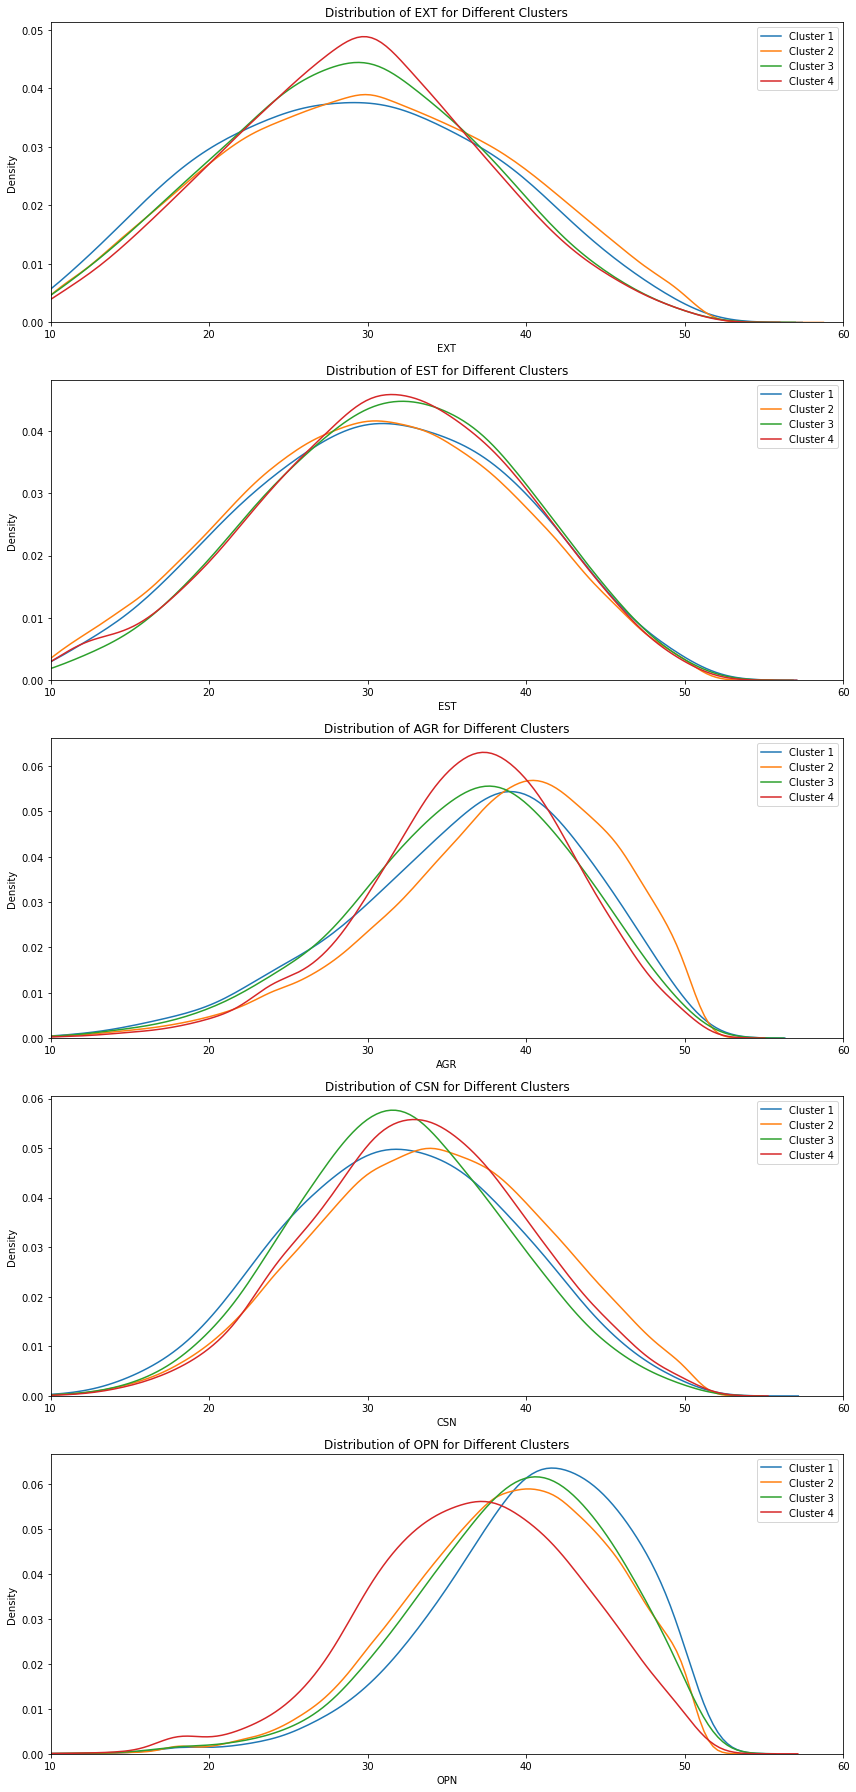

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 merged_df0 已经被读取为 pandas 数据框
# merged_df0 = pd.read_csv('your_file.csv')  # 如果从文件读取数据

# 创建一个绘图函数
def plot_ext_distribution(ax, df, clusters, ext_col='EXT', xlim=(10, 60), cluster_col='cluster'):
    for cluster in clusters:
        subset = df[df[cluster_col] == cluster]
        sns.kdeplot(subset[ext_col], ax=ax, label=f'Cluster {cluster}', shade=False, bw_adjust=2)

    ax.set_xlabel(ext_col)
    ax.set_ylabel('Density')
    ax.set_xlim(xlim)
    ax.set_title(f'Distribution of {ext_col} for Different Clusters')
    ax.legend()

# 选定需要绘制的 cluster 值
clusters = [1, 2, 3, 4]

# 创建一个包含五个子图的画布
fig, axs = plt.subplots(5, 1, figsize=(12, 25))

# 调用绘图函数并将结果绘制在不同的子图上
plot_ext_distribution(axs[0], merged_df0, clusters, 'EXT')
plot_ext_distribution(axs[1], merged_df0, clusters, 'EST')
plot_ext_distribution(axs[2], merged_df0, clusters, 'AGR')
plot_ext_distribution(axs[3], merged_df0, clusters, 'CSN')
plot_ext_distribution(axs[4], merged_df0, clusters, 'OPN')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('四个类的人格分布.png')

# 展示图片
plt.show()


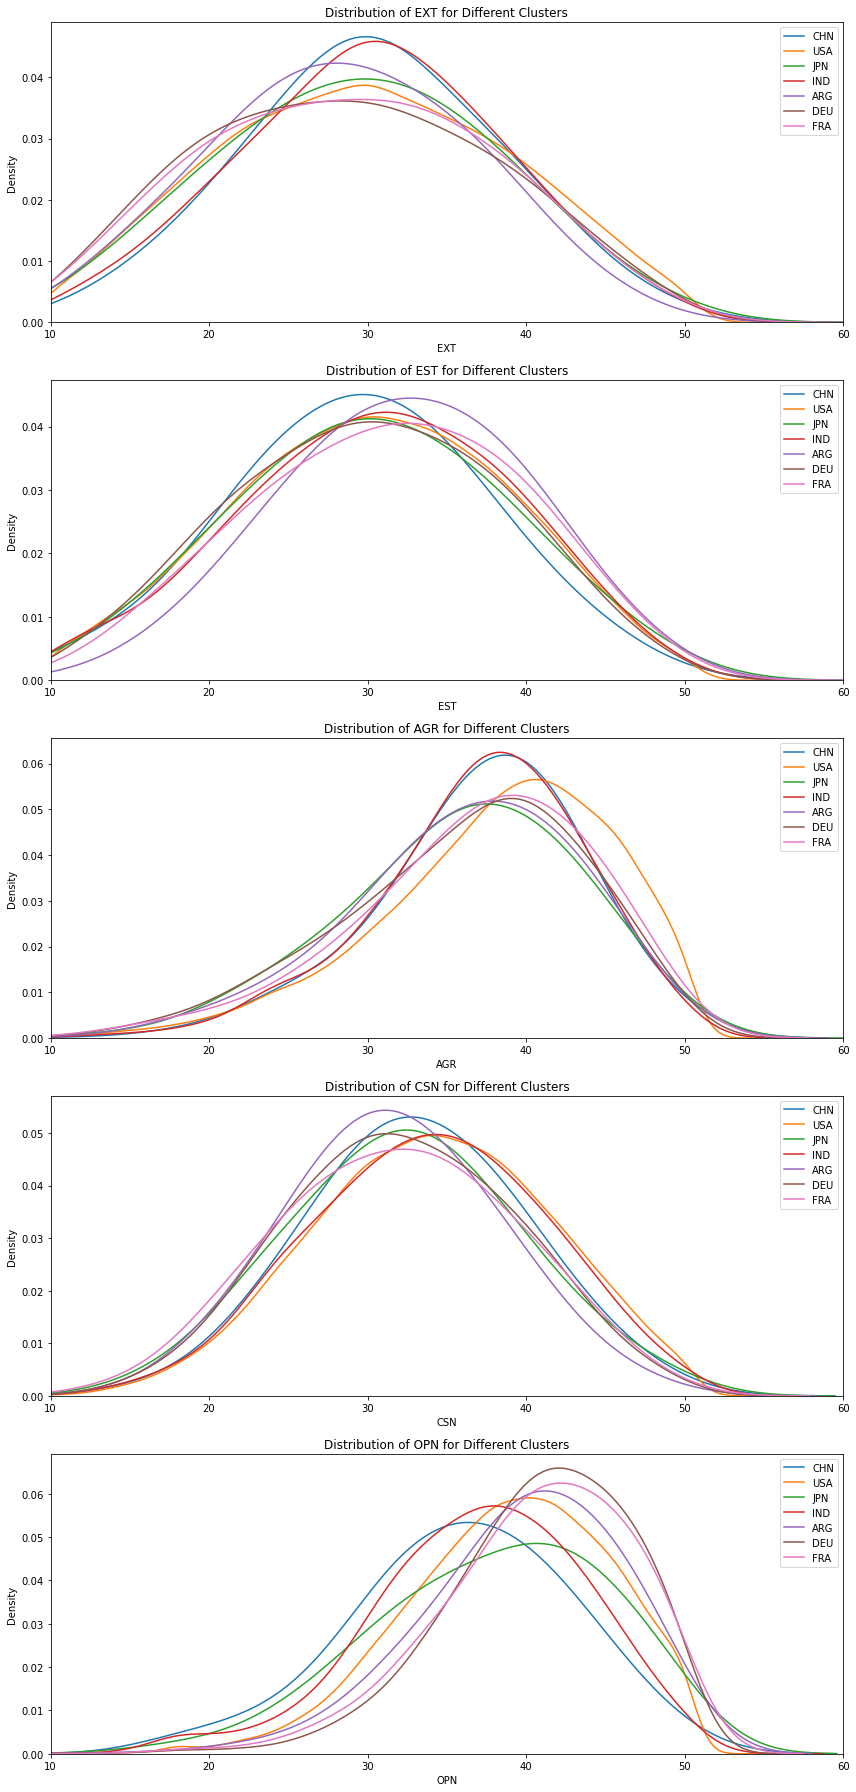

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 merged_df0 已经被读取为 pandas 数据框
# merged_df0 = pd.read_csv('your_file.csv')  # 如果从文件读取数据

# 创建一个绘图函数
def plot_ext_distribution(df, clusters, ext_cols, xlim=(10, 60), cluster_col='ctr', filename='选了几个国家的人格分布.png'):
    plt.figure(figsize=(12, 25))

    for i, ext_col in enumerate(ext_cols, 1):
        plt.subplot(5, 1, i)
        for cluster in clusters:
            subset = df[df[cluster_col] == cluster]
            sns.kdeplot(subset[ext_col], label=f'{cluster}', shade=False, bw_adjust=2)

        plt.xlabel(ext_col)
        plt.ylabel('Density')
        plt.xlim(xlim)
        plt.title('Distribution of ' + ext_col + ' for Different Clusters')
        plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# 选定需要绘制的 cluster 值
# clusters = ['CHN','USA','CAN','PHL','IND','ESP','DEU','BRA','NZL','MYS','MEX','FRA']
# clusters = ['CHN','USA','PHL','IND','ESP','DEU','MYS','MEX','FRA','BEL','ARG','PRT','CZE','JPN','BGR']
# clusters = ['CHN','USA','JPN','IND','MYS','ARG','DEU']
clusters = ['CHN','USA','JPN','IND','ARG','DEU','FRA']

# 调用绘图函数
ext_cols = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
plot_ext_distribution(merged_df0, clusters, ext_cols)


In [16]:
# ctr_counts = merged_df0['ctr'].value_counts()
# print(ctr_counts.head(50))

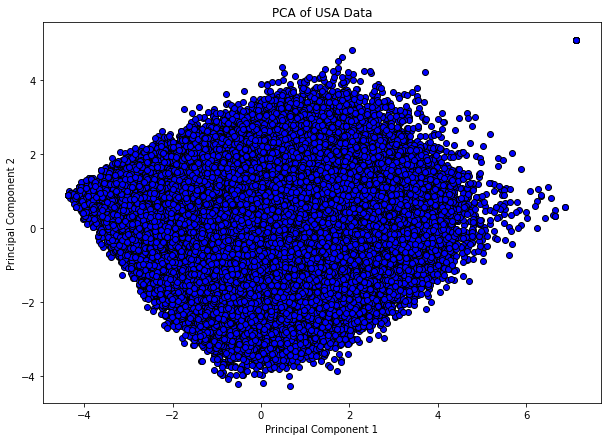

In [17]:
# 提取USA的数据
usa_data = merged_df0[merged_df0['ctr'] == 'USA']

# 选择需要聚类的列
columns_to_cluster = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
usa_data_cluster = usa_data[columns_to_cluster]

# 标准化数据
scaler = StandardScaler()
usa_data_cluster_scaled = scaler.fit_transform(usa_data_cluster)

# 使用PCA进行降维
pca = PCA(n_components=2)
usa_data_pca = pca.fit_transform(usa_data_cluster_scaled)

# 绘制PCA结果
plt.figure(figsize=(10, 7))
plt.scatter(usa_data_pca[:, 0], usa_data_pca[:, 1], c='blue', edgecolor='k')
plt.title('PCA of USA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
merged_df0

country   EXT   EST   AGR   CSN   OPN   pdi   idv   mas   uai  ltowvs  \
0           AR  20.0  47.0  40.0  29.0  33.0  49.0  46.0  56.0  86.0    20.0   
1           AR  26.0  35.0  31.0  41.0  45.0  49.0  46.0  56.0  86.0    20.0   
2           AR  39.0  31.0  38.0  40.0  46.0  49.0  46.0  56.0  86.0    20.0   
3           AR  43.0  15.0  43.0  21.0  41.0  49.0  46.0  56.0  86.0    20.0   
4           AR  17.0  49.0  40.0  16.0  48.0  49.0  46.0  56.0  86.0    20.0   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...   
902633      VN  25.0  37.0  37.0  38.0  37.0  70.0  20.0  40.0  30.0    57.0   
902634      VN  21.0  25.0  29.0  32.0  42.0  70.0  20.0  40.0  30.0    57.0   
902635      VN  18.0  34.0  25.0  34.0  39.0  70.0  20.0  40.0  30.0    57.0   
902636      VN  27.0  31.0  34.0  35.0  36.0  70.0  20.0  40.0  30.0    57.0   
902637      VN  40.0  27.0  40.0  50.0  38.0  70.0  20.0  40.0  30.0    57.0   

         ivr  ctr  cluster  
0       62.0  ARG        3  
1       62.0  ARG        3  
2       62.0  ARG        3  
3       62.0  ARG        3  
4       62.0  ARG        3  
...      ...  ...      ...  
902633  35.0  VNM        4  
902634  35.0  VNM        4  
902635  35.0  VNM        4  
902636  35.0  VNM        4  
902637  35.0  VNM        4  

[902638 rows x 14 columns]

In [19]:
from sklearn.ensemble import IsolationForest

# 假设你的数据已经加载到 merged_df0 中
# merged_df0 = pd.read_csv('your_data.csv')

# 提取要用于检测异常的特征列
features = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
merged_df0 = merged_df0.dropna(subset=['EXT', 'EST', 'AGR', 'CSN', 'OPN'])

# 提取特征数据
X = merged_df0[features]

# 创建并训练孤独森林模型
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(X)

# 预测异常点
merged_df0['anomaly'] = iso_forest.predict(X)

# 标记异常点
# 在孤独森林模型中，预测值为 -1 表示异常点，1 表示正常点
merged_df0['anomaly'] = merged_df0['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')

merged_df0.head()

<ipython-input-19-2c3fe5699213>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df0['anomaly'] = iso_forest.predict(X)
<ipython-input-19-2c3fe5699213>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df0['anomaly'] = merged_df0['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')


country   EXT   EST   AGR   CSN   OPN   pdi   idv   mas   uai  ltowvs   ivr  \
0      AR  20.0  47.0  40.0  29.0  33.0  49.0  46.0  56.0  86.0    20.0  62.0   
1      AR  26.0  35.0  31.0  41.0  45.0  49.0  46.0  56.0  86.0    20.0  62.0   
2      AR  39.0  31.0  38.0  40.0  46.0  49.0  46.0  56.0  86.0    20.0  62.0   
3      AR  43.0  15.0  43.0  21.0  41.0  49.0  46.0  56.0  86.0    20.0  62.0   
4      AR  17.0  49.0  40.0  16.0  48.0  49.0  46.0  56.0  86.0    20.0  62.0   

   ctr  cluster  anomaly  
0  ARG        3   normal  
1  ARG        3   normal  
2  ARG        3   normal  
3  ARG        3  anomaly  
4  ARG        3  anomaly

In [20]:
anomaly_counts = merged_df0['anomaly'].value_counts()

anomaly_counts

normal     712742
anomaly    189895
Name: anomaly, dtype: int64

In [21]:
grouped = merged_df0.groupby('ctr').agg(
    count=('ctr', 'size'),
    ext_mean=('EXT', 'mean'),
    ext_var=('EXT', 'var'),
    est_mean=('EST', 'mean'),
    est_var=('EST', 'var'),
    agr_mean=('AGR', 'mean'),
    agr_var=('AGR', 'var'),
    csn_mean=('CSN', 'mean'),
    csn_var=('CSN', 'var'),
    opn_mean=('OPN', 'mean'),
    opn_var=('OPN', 'var'),
    anomaly_count=('anomaly', lambda x: (x == 'anomaly').sum())
).reset_index()

# 重命名列以便更清楚
grouped.rename(columns={
    'ext_mean': 'EXT_mean', 'ext_var': 'EXT_var',
    'est_mean': 'EST_mean', 'est_var': 'EST_var',
    'agr_mean': 'AGR_mean', 'agr_var': 'AGR_var',
    'csn_mean': 'CSN_mean', 'csn_var': 'CSN_var',
    'opn_mean': 'OPN_mean', 'opn_var': 'OPN_var'
}, inplace=True)

grouped

ctr   count   EXT_mean     EXT_var   EST_mean     EST_var   AGR_mean  \
0   ARG    3154  28.341788   70.242167  32.142676   64.941261  36.067850   
1   AUS   50030  29.838577   83.715772  30.166020   77.901958  37.611953   
2   AUT    2215  29.906998   83.891979  29.845147   70.158033  36.772912   
3   BEL    3824  29.956590   81.570179  30.418672   69.806096  37.523536   
4   BGD     319  26.673981   84.239289  31.752351   73.545395  36.134796   
5   BGR    1271  28.916601   88.701701  31.146341   75.373843  35.647522   
6   BRA    6245  26.636349   86.707743  31.431865   78.001643  34.831225   
7   CAN   61849  29.588094   83.339417  30.570858   75.471118  37.724587   
8   CHE    3124  30.322983   75.398370  29.444622   69.727000  37.448784   
9   CHL    2193  28.595075   65.012968  31.494300   68.023804  36.575011   
10  CHN    1340  30.257463   60.298861  29.478358   61.849419  37.254478   
11  COL    3619  28.964078   60.510042  31.481072   70.725664  35.340149   
12  CZE    2014  28.538729   86.392687  31.144489   73.968680  35.385799   
13  DEU   14095  28.719546   86.091554  30.050514   73.628355  36.135509   
14  DNK    5512  30.874819   84.133120  30.295174   73.168345  37.484398   
15  ESP    5008  30.142772   77.448156  30.232228   68.744741  37.288339   
16  EST    1020  28.437255   91.535804  30.234314   76.960745  35.759804   
17  FIN    4340  28.038479   90.765746  31.012673   76.766145  35.082719   
18  FRA    6145  28.834337   82.496640  31.237754   72.808210  36.850285   
19  GRC    2513  28.998408   74.765921  32.857541   66.430334  36.479904   
20  HKG    3595  29.378860   65.986086  30.876217   68.228691  36.641168   
21  HRV    2245  29.136303   80.820985  30.439644   74.975522  35.689978   
22  HUN    1506  28.514608   86.760252  31.088977   74.742908  35.638778   
23  IDN    6489  28.102019   68.409443  31.480968   65.550539  35.699029   
24  IND   17491  30.201704   69.947878  30.570122   74.368825  37.069693   
25  IRL    5409  30.022740   82.113573  31.105935   76.677940  37.511740   
26  IRN     429  29.132867   62.863146  31.279720   67.001013  35.885781   
27  ITA    5319  29.118819   72.519163  31.914646   72.774962  36.663095   
28  JPN    1933  29.474392   74.586947  30.257113   72.072057  36.005173   
29  KOR    1593  29.277464   73.500855  30.589454   75.272301  35.494036   
30  LTU    1101  27.526794   88.949509  31.726612   72.240646  34.266122   
31  LUX     220  29.509091   88.844666  29.231818   79.996243  36.181818   
32  LVA     517  28.375242   86.281401  31.195358   78.537343  34.363636   
33  MAR     499  26.272545   74.881393  31.805611   67.237238  34.993988   
34  MEX   11152  29.170732   66.858123  31.502331   66.753470  35.246951   
35  MLT     378  28.917989   76.934901  31.825397   79.497284  37.150794   
36  MYS   11355  28.638397   58.796130  31.522149   62.497374  36.049229   
37  NLD    9785  30.941952   80.950228  29.115278   68.171705  37.697701   
38  NOR   11417  29.776299  113.595714  28.533765  104.028664  36.306998   
39  NZL   12992  30.419720   77.525538  30.257004   69.479860  37.276786   
40  PAK    3511  30.064369   63.059103  31.387069   70.450989  38.093990   
41  PER    1659  29.124774   54.513373  31.775166   61.964497  35.164557   
42  PHL   19847  28.389983   52.264110  31.780874   60.674696  36.172167   
43  POL    4659  27.280103   87.643509  32.536167   79.582365  33.810904   
44  PRT    2519  26.903533   76.406497  31.312823   67.840944  36.232632   
45  ROU    3858  28.819077   79.840217  31.040176   69.916197  35.605754   
46  RUS    3323  27.982245   75.987945  32.432441   75.054661  34.476076   
47  SGP    7686  28.362998   77.178300  30.911918   74.963093  36.559979   
48  SLV     197  28.370558   76.418108  31.015228   61.708951  35.913706   
49  SRB    2065  29.284262   80.943866  31.086199   77.891791  36.034383   
50  SVK     992  28.595766   82.541778  30.461694   73.506099  35.346774   
51  SVN     866  28.581986   91.334889  30.863741   

In [22]:
import pandas as pd
import numpy as np

# 假设merged_df0是你已经加载的数据框
# merged_df0 = pd.read_csv('path_to_your_csv_file.csv')

# 定义区间
bins = [20, 24, 28, 32, 36, 40, 44, 48]
labels = ['20_24', '24_28', '28_32', '32_36', '36_40', '40_44', '44_48']

# 对每个特征列进行分箱
for col in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']:
    merged_df0[f'{col}_bin'] = pd.cut(merged_df0[col], bins=bins, labels=labels, right=False)

# 按ctr分组并计算各区间的占比
grouped1 = merged_df0.groupby('ctr').apply(lambda x: pd.Series({
    f'EXT_ratio_{label}': (x['EXT_bin'] == label).mean() for label in labels
}).append(pd.Series({
    f'EST_ratio_{label}': (x['EST_bin'] == label).mean() for label in labels
})).append(pd.Series({
    f'AGR_ratio_{label}': (x['AGR_bin'] == label).mean() for label in labels
})).append(pd.Series({
    f'CSN_ratio_{label}': (x['CSN_bin'] == label).mean() for label in labels
})).append(pd.Series({
    f'OPN_ratio_{label}': (x['OPN_bin'] == label).mean() for label in labels
}))).reset_index()

# 定义计算熵的函数
def compute_entropy(series):
    series = series[series > 0]  # 忽略占比为0的项，避免log(0)问题
    return -np.sum(series * np.log2(series))

for col in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']:
    ratio_cols = [f'{col}_ratio_{label}' for label in labels]
    grouped1[f'{col}_entropy'] = grouped1[ratio_cols].apply(compute_entropy, axis=1)


# 查看结果
grouped1


<ipython-input-22-d4176e281357>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df0[f'{col}_bin'] = pd.cut(merged_df0[col], bins=bins, labels=labels, right=False)


ctr  EXT_ratio_20_24  EXT_ratio_24_28  EXT_ratio_28_32  EXT_ratio_32_36  \
0   ARG         0.136335         0.170260         0.176601         0.150602   
1   AUS         0.119748         0.143214         0.159324         0.152768   
2   AUT         0.124153         0.136795         0.144921         0.151242   
3   BEL         0.112448         0.148274         0.160042         0.150105   
4   BGD         0.122257         0.175549         0.178683         0.087774   
5   BGR         0.131393         0.156570         0.128245         0.131393   
6   BRA         0.143635         0.145236         0.141233         0.118655   
7   CAN         0.122880         0.145694         0.157011         0.144529   
8   CHE         0.117798         0.161972         0.153329         0.151088   
9   CHL         0.124943         0.181487         0.196534         0.166439   
10  CHN         0.111194         0.154478         0.226866         0.160448   
11  COL         0.119923         0.189831         0.220779         0.174358   
12  CZE         0.126117         0.147964         0.149454         0.135055   
13  DEU         0.133168         0.145513         0.146293         0.131820   
14  DNK         0.105769         0.125544         0.151306         0.152758   
15  ESP         0.116414         0.139976         0.159145         0.168930   
16  EST         0.128431         0.134314         0.147059         0.122549   
17  FIN         0.141014         0.143779         0.141475         0.114747   
18  FRA         0.133116         0.146949         0.142880         0.148413   
19  GRC         0.130521         0.162754         0.158376         0.149224   
20  HKG         0.124618         0.157719         0.189152         0.182754   
21  HRV         0.126949         0.146548         0.174610         0.131403   
22  HUN         0.127490         0.136786         0.155378         0.132802   
23  IDN         0.139159         0.161658         0.187086         0.145939   
24  IND         0.105883         0.147676         0.189583         0.173232   
25  IRL         0.119246         0.142910         0.159919         0.137179   
26  IRN         0.121212         0.174825         0.233100         0.160839   
27  ITA         0.130852         0.152284         0.164693         0.156984   
28  JPN         0.119503         0.153647         0.173306         0.155199   
29  KOR         0.119900         0.158820         0.178908         0.152542   
30  LTU         0.146231         0.138965         0.144414         0.111717   
31  LUX         0.136364         0.159091         0.195455         0.113636   
32  LVA         0.150870         0.150870         0.162476         0.125725   
33  MAR         0.148297         0.166333         0.158317         0.112224   
34  MEX         0.113343         0.179968         0.199695         0.171808   
35  MLT         0.132275         0.158730         0.166667         0.153439   
36  MYS         0.120387         0.179745         0.223338         0.166182   
37  NLD         0.108125         0.130404         0.157793         0.154011   
38  NOR         0.101077         0.133047         0.147675         0.146886   
39  NZL         0.106142         0.142318         0.169643         0.159175   
40  PAK         0.107662         0.152378         0.199658         0.180575   
41  PER         0.115130         0.187462         0.235684         0.185654   
42  PHL         0.124452         0.184713         0.241548         0.175644   
43  POL         0.136939         0.151320         0.136295         0.120841   
44  PRT         0.165939         0.159984         0.156808         0.110758   
45  ROU         0.135822         0.149819         0.160187         0.148263   
46  RUS         0.143545         0.160397         0.163106         0.138730   
47  SGP         0.139084         0.169269         0.161462         0.147671   
48  SLV         0.121827         0.126904         0.218274         0.177665   
49  SRB         0.129298         0.153995         0.14

In [23]:
merged_data = pd.merge(grouped1, grouped, on='ctr', how='inner') 

In [24]:
merged_data['anomaly_count_ratio'] = merged_data['anomaly_count'] / merged_data['count']

merged_data.drop(columns=['anomaly_count'], inplace=True)
merged_data

ctr  EXT_ratio_20_24  EXT_ratio_24_28  EXT_ratio_28_32  EXT_ratio_32_36  \
0   ARG         0.136335         0.170260         0.176601         0.150602   
1   AUS         0.119748         0.143214         0.159324         0.152768   
2   AUT         0.124153         0.136795         0.144921         0.151242   
3   BEL         0.112448         0.148274         0.160042         0.150105   
4   BGD         0.122257         0.175549         0.178683         0.087774   
5   BGR         0.131393         0.156570         0.128245         0.131393   
6   BRA         0.143635         0.145236         0.141233         0.118655   
7   CAN         0.122880         0.145694         0.157011         0.144529   
8   CHE         0.117798         0.161972         0.153329         0.151088   
9   CHL         0.124943         0.181487         0.196534         0.166439   
10  CHN         0.111194         0.154478         0.226866         0.160448   
11  COL         0.119923         0.189831         0.220779         0.174358   
12  CZE         0.126117         0.147964         0.149454         0.135055   
13  DEU         0.133168         0.145513         0.146293         0.131820   
14  DNK         0.105769         0.125544         0.151306         0.152758   
15  ESP         0.116414         0.139976         0.159145         0.168930   
16  EST         0.128431         0.134314         0.147059         0.122549   
17  FIN         0.141014         0.143779         0.141475         0.114747   
18  FRA         0.133116         0.146949         0.142880         0.148413   
19  GRC         0.130521         0.162754         0.158376         0.149224   
20  HKG         0.124618         0.157719         0.189152         0.182754   
21  HRV         0.126949         0.146548         0.174610         0.131403   
22  HUN         0.127490         0.136786         0.155378         0.132802   
23  IDN         0.139159         0.161658         0.187086         0.145939   
24  IND         0.105883         0.147676         0.189583         0.173232   
25  IRL         0.119246         0.142910         0.159919         0.137179   
26  IRN         0.121212         0.174825         0.233100         0.160839   
27  ITA         0.130852         0.152284         0.164693         0.156984   
28  JPN         0.119503         0.153647         0.173306         0.155199   
29  KOR         0.119900         0.158820         0.178908         0.152542   
30  LTU         0.146231         0.138965         0.144414         0.111717   
31  LUX         0.136364         0.159091         0.195455         0.113636   
32  LVA         0.150870         0.150870         0.162476         0.125725   
33  MAR         0.148297         0.166333         0.158317         0.112224   
34  MEX         0.113343         0.179968         0.199695         0.171808   
35  MLT         0.132275         0.158730         0.166667         0.153439   
36  MYS         0.120387         0.179745         0.223338         0.166182   
37  NLD         0.108125         0.130404         0.157793         0.154011   
38  NOR         0.101077         0.133047         0.147675         0.146886   
39  NZL         0.106142         0.142318         0.169643         0.159175   
40  PAK         0.107662         0.152378         0.199658         0.180575   
41  PER         0.115130         0.187462         0.235684         0.185654   
42  PHL         0.124452         0.184713         0.241548         0.175644   
43  POL         0.136939         0.151320         0.136295         0.120841   
44  PRT         0.165939         0.159984         0.156808         0.110758   
45  ROU         0.135822         0.149819         0.160187         0.148263   
46  RUS         0.143545         0.160397         0.163106         0.138730   
47  SGP         0.139084         0.169269         0.161462         0.147671   
48  SLV         0.121827         0.126904         0.218274         0.177665   
49  SRB         0.129298         0.153995         0.14

In [25]:
ctr_to_cluster_map = merged_df0.set_index('ctr')['cluster'].to_dict()

# 使用map函数根据ctr列从映射关系中提取对应的cluster值
merged_data['cluster'] = merged_data['ctr'].map(ctr_to_cluster_map)

# 打印结果查看
merged_data

ctr  EXT_ratio_20_24  EXT_ratio_24_28  EXT_ratio_28_32  EXT_ratio_32_36  \
0   ARG         0.136335         0.170260         0.176601         0.150602   
1   AUS         0.119748         0.143214         0.159324         0.152768   
2   AUT         0.124153         0.136795         0.144921         0.151242   
3   BEL         0.112448         0.148274         0.160042         0.150105   
4   BGD         0.122257         0.175549         0.178683         0.087774   
5   BGR         0.131393         0.156570         0.128245         0.131393   
6   BRA         0.143635         0.145236         0.141233         0.118655   
7   CAN         0.122880         0.145694         0.157011         0.144529   
8   CHE         0.117798         0.161972         0.153329         0.151088   
9   CHL         0.124943         0.181487         0.196534         0.166439   
10  CHN         0.111194         0.154478         0.226866         0.160448   
11  COL         0.119923         0.189831         0.220779         0.174358   
12  CZE         0.126117         0.147964         0.149454         0.135055   
13  DEU         0.133168         0.145513         0.146293         0.131820   
14  DNK         0.105769         0.125544         0.151306         0.152758   
15  ESP         0.116414         0.139976         0.159145         0.168930   
16  EST         0.128431         0.134314         0.147059         0.122549   
17  FIN         0.141014         0.143779         0.141475         0.114747   
18  FRA         0.133116         0.146949         0.142880         0.148413   
19  GRC         0.130521         0.162754         0.158376         0.149224   
20  HKG         0.124618         0.157719         0.189152         0.182754   
21  HRV         0.126949         0.146548         0.174610         0.131403   
22  HUN         0.127490         0.136786         0.155378         0.132802   
23  IDN         0.139159         0.161658         0.187086         0.145939   
24  IND         0.105883         0.147676         0.189583         0.173232   
25  IRL         0.119246         0.142910         0.159919         0.137179   
26  IRN         0.121212         0.174825         0.233100         0.160839   
27  ITA         0.130852         0.152284         0.164693         0.156984   
28  JPN         0.119503         0.153647         0.173306         0.155199   
29  KOR         0.119900         0.158820         0.178908         0.152542   
30  LTU         0.146231         0.138965         0.144414         0.111717   
31  LUX         0.136364         0.159091         0.195455         0.113636   
32  LVA         0.150870         0.150870         0.162476         0.125725   
33  MAR         0.148297         0.166333         0.158317         0.112224   
34  MEX         0.113343         0.179968         0.199695         0.171808   
35  MLT         0.132275         0.158730         0.166667         0.153439   
36  MYS         0.120387         0.179745         0.223338         0.166182   
37  NLD         0.108125         0.130404         0.157793         0.154011   
38  NOR         0.101077         0.133047         0.147675         0.146886   
39  NZL         0.106142         0.142318         0.169643         0.159175   
40  PAK         0.107662         0.152378         0.199658         0.180575   
41  PER         0.115130         0.187462         0.235684         0.185654   
42  PHL         0.124452         0.184713         0.241548         0.175644   
43  POL         0.136939         0.151320         0.136295         0.120841   
44  PRT         0.165939         0.159984         0.156808         0.110758   
45  ROU         0.135822         0.149819         0.160187         0.148263   
46  RUS         0.143545         0.160397         0.163106         0.138730   
47  SGP         0.139084         0.169269         0.161462         0.147671   
48  SLV         0.121827         0.126904         0.218274         0.177665   
49  SRB         0.129298         0.153995         0.14

In [26]:
merged_data.columns

Index(['ctr', 'EXT_ratio_20_24', 'EXT_ratio_24_28', 'EXT_ratio_28_32',
       'EXT_ratio_32_36', 'EXT_ratio_36_40', 'EXT_ratio_40_44',
       'EXT_ratio_44_48', 'EST_ratio_20_24', 'EST_ratio_24_28',
       'EST_ratio_28_32', 'EST_ratio_32_36', 'EST_ratio_36_40',
       'EST_ratio_40_44', 'EST_ratio_44_48', 'AGR_ratio_20_24',
       'AGR_ratio_24_28', 'AGR_ratio_28_32', 'AGR_ratio_32_36',
       'AGR_ratio_36_40', 'AGR_ratio_40_44', 'AGR_ratio_44_48',
       'CSN_ratio_20_24', 'CSN_ratio_24_28', 'CSN_ratio_28_32',
       'CSN_ratio_32_36', 'CSN_ratio_36_40', 'CSN_ratio_40_44',
       'CSN_ratio_44_48', 'OPN_ratio_20_24', 'OPN_ratio_24_28',
       'OPN_ratio_28_32', 'OPN_ratio_32_36', 'OPN_ratio_36_40',
       'OPN_ratio_40_44', 'OPN_ratio_44_48', 'EXT_entropy', 'EST_entropy',
       'AGR_entropy', 'CSN_entropy', 'OPN_entropy', 'count', 'EXT_mean',
       'EXT_var', 'EST_mean', 'EST_var', 'AGR_mean', 'AGR_var', 'CSN_mean',
       'CSN_var', 'OPN_mean', 'OPN_var', 'anomaly_count_ratio', '

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = merged_data.drop(['cluster','ctr'], axis=1, inplace=False)  # 特征集
y = merged_data['cluster']  # 目标变量集

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 使用整个数据集训练模型
rf.fit(X, y)

# 预测和评估模型
y_pred = rf.predict(X)

# 打印分类报告来评估模型
print(classification_report(y, y_pred))

# 使用交叉验证来评估模型性能
from sklearn.model_selection import cross_val_score

# 计算交叉验证分数
cv_scores = cross_val_score(rf, X, y, cv=5)

# 打印交叉验证分数
print("交叉验证分数:", cv_scores)
print("平均分数:", cv_scores.mean())

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

交叉验证分数: [0.58333333 0.66666667 0.75       0.41666667 0.58333333]
平均分数: 0.6


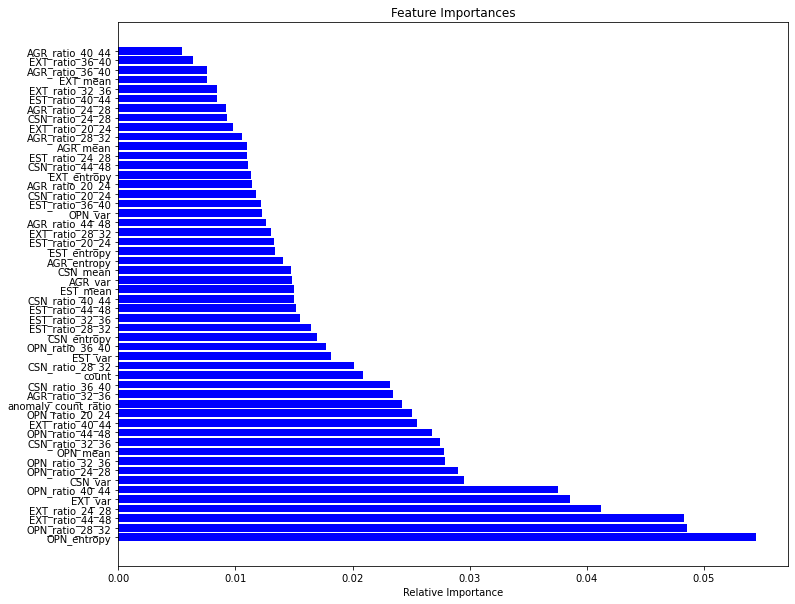

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你的代码已经运行到这里，并且rf模型已经被训练

# 获取特征重要性
feature_importances = rf.feature_importances_

# 获取特征名称
feature_names = X.columns

# 特征重要性排序
sorted_indices = np.argsort(feature_importances)[::-1]

# 绘制特征重要性
plt.figure(figsize=(12, 10))
plt.title('Feature Importances')
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], color='b', align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
def analysis_bf_cul(culture_col):
    print('正在评估'+culture_col)
    dfc2 = culture.dropna(subset=[culture_col,'ctr1'])
    dfc2= dfc2.drop(columns=['Unnamed: 0'])
    print(dfc2.shape[0])
    merged_df1=df0.merge(dfc2, how='right', left_on='ctr', right_on='ctr1')
    
    new_column_names = {
        'country_x': 'country',
        'ctr1': 'ctr',
    }
    
    # merged_df1 = merged_df1[['country_x', 'EXT', 'EST', 'AGR', 'CSN', 'OPN','pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr','ctr1']]
    merged_df1 = merged_df1[['country_x', 'EXT', 'EST', 'AGR', 'CSN', 'OPN',culture_col,'ctr1']]
    merged_df1.rename(columns=new_column_names, inplace=True)
    
    print('有效的数据数量：',merged_df1['ctr'].nunique())
    
    features = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
    merged_df1 = merged_df1.dropna(subset=['EXT', 'EST', 'AGR', 'CSN', 'OPN'])
    
    # 提取特征数据
    X = merged_df1[features]
    
    # 创建并训练孤独森林模型
    iso_forest = IsolationForest(contamination='auto', random_state=42)
    iso_forest.fit(X)
    
    # 预测异常点
    merged_df1['anomaly'] = iso_forest.predict(X)
    
    # 标记异常点
    # 在孤独森林模型中，预测值为 -1 表示异常点，1 表示正常点
    merged_df1['anomaly'] = merged_df1['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')
    
    grouped = merged_df1.groupby('ctr').agg(
        count=('ctr', 'size'),
        ext_mean=('EXT', 'mean'),
        ext_var=('EXT', 'var'),
        est_mean=('EST', 'mean'),
        est_var=('EST', 'var'),
        agr_mean=('AGR', 'mean'),
        agr_var=('AGR', 'var'),
        csn_mean=('CSN', 'mean'),
        csn_var=('CSN', 'var'),
        opn_mean=('OPN', 'mean'),
        opn_var=('OPN', 'var'),
        target=(culture_col, 'mean'),
        anomaly_count=('anomaly', lambda x: (x == 'anomaly').sum())
    ).reset_index()
    
    # 重命名列以便更清楚
    grouped.rename(columns={
        'ext_mean': 'EXT_mean', 'ext_var': 'EXT_var',
        'est_mean': 'EST_mean', 'est_var': 'EST_var',
        'agr_mean': 'AGR_mean', 'agr_var': 'AGR_var',
        'csn_mean': 'CSN_mean', 'csn_var': 'CSN_var',
        'opn_mean': 'OPN_mean', 'opn_var': 'OPN_var',
    }, inplace=True)
    
    # 定义区间
    bins = [20, 24, 28, 32, 36, 40, 44, 48]
    labels = ['20_24', '24_28', '28_32', '32_36', '36_40', '40_44', '44_48']
    
    # 对每个特征列进行分箱
    for col in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']:
        merged_df1[f'{col}_bin'] = pd.cut(merged_df1[col], bins=bins, labels=labels, right=False)
    
    # 按ctr分组并计算各区间的占比
    grouped1 = merged_df1.groupby('ctr').apply(lambda x: pd.Series({
        f'EXT_ratio_{label}': (x['EXT_bin'] == label).mean() for label in labels
    }).append(pd.Series({
        f'EST_ratio_{label}': (x['EST_bin'] == label).mean() for label in labels
    })).append(pd.Series({
        f'AGR_ratio_{label}': (x['AGR_bin'] == label).mean() for label in labels
    })).append(pd.Series({
        f'CSN_ratio_{label}': (x['CSN_bin'] == label).mean() for label in labels
    })).append(pd.Series({
        f'OPN_ratio_{label}': (x['OPN_bin'] == label).mean() for label in labels
    }))).reset_index()
    
    # 定义计算熵的函数
    def compute_entropy(series):
        series = series[series > 0]  # 忽略占比为0的项，避免log(0)问题
        return -np.sum(series * np.log2(series))
    
    for col in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']:
        ratio_cols = [f'{col}_ratio_{label}' for label in labels]
        grouped1[f'{col}_entropy'] = grouped1[ratio_cols].apply(compute_entropy, axis=1)
    
    
    merged_data = pd.merge(grouped1, grouped, on='ctr', how='inner') 
    
    merged_data['anomaly_count_ratio'] = merged_data['anomaly_count'] / merged_data['count']
    
    merged_data.drop(columns=['anomaly_count'], inplace=True)
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error
    from scipy import stats
    
    # 假设merged_data是包含所需数据的DataFrame
    X = merged_data.drop(['ctr','target'], axis=1, inplace=False)  # 特征集
    y = merged_data['target']  # 目标列
    
    # 创建随机森林回归模型
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # 使用交叉验证评估模型性能
    # cv参数定义了交叉验证的折数
    # scoring参数定义了评估指标，这里使用负均方误差
    scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # 计算交叉验证分数的平均值和标准差
    mean_score = -scores.mean()  # 取负均方误差的平均值
    std_dev = scores.std()
    
    print(f"交叉验证的MSE平均值: {mean_score}")
    print(f"交叉验证的MSE标准差: {std_dev}")
    
    # 训练模型（使用全部数据）
    rf_model.fit(X, y)
    y_pred = rf_model.predict(X)
    
    # 计算残差
    residuals = y - y_pred
    
    # 绘制QQ图
    stats.probplot(residuals, dist="norm", plot=plt)
    
    # 显示图形
    plt.title('QQ Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Residuals')
    plt.savefig(culture_col+'_qq.png')
    plt.show()
    
    import shap
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)
    
    summary_plot = shap.summary_plot(shap_values, X, max_display=12,show=False)
    colorbar_axes = plt.gcf().get_axes()[-1]  # 获取当前图形的颜色条轴对象
    colorbar_axes.set_yticklabels(['low', 'high'],size=15)  # 设置颜色条轴的刻度标签, 设置字体大小
    
    # 将图保存到文件（例如PNG）
    plt.savefig(culture_col+'_shap_summary_plot.png')
    plt.show()

正在评估pdi
68
有效的数据数量： 68
交叉验证的MSE平均值: 349.8747847252747
交叉验证的MSE标准差: 88.55693193003431


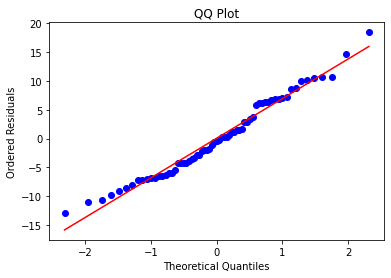

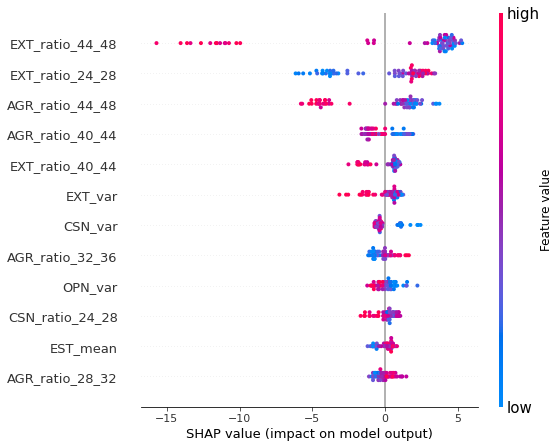

In [56]:
analysis_bf_cul('pdi')

正在评估idv
68
有效的数据数量： 68
交叉验证的MSE平均值: 278.89219747252747
交叉验证的MSE标准差: 42.340811238983875


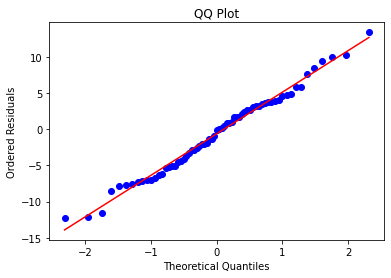

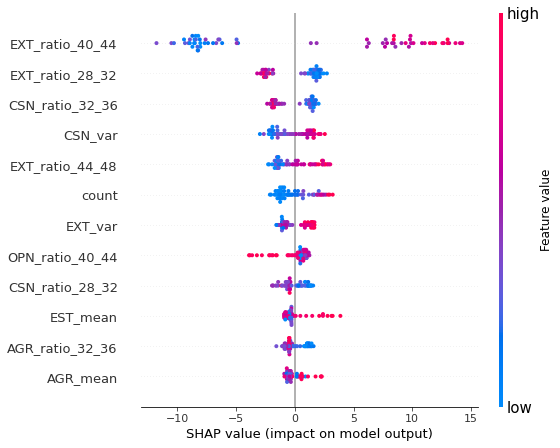

In [57]:
analysis_bf_cul('idv')

正在评估mas
68
有效的数据数量： 68
交叉验证的MSE平均值: 325.0867031868132
交叉验证的MSE标准差: 119.60503695385486


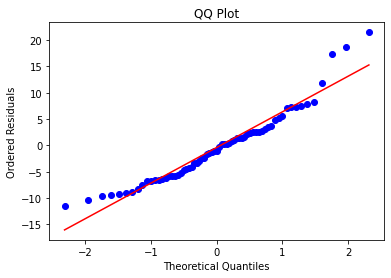

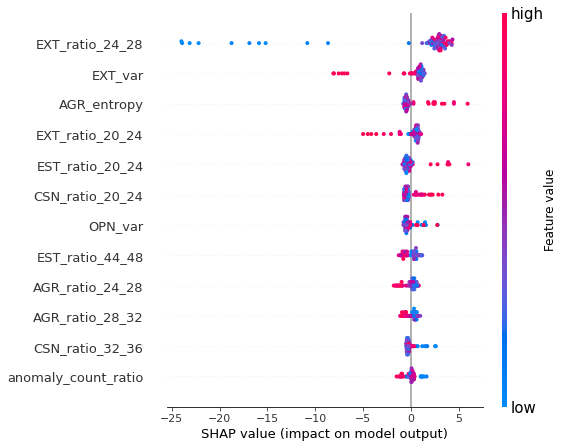

In [58]:
analysis_bf_cul('mas')


正在评估uai
68
有效的数据数量： 68
交叉验证的MSE平均值: 410.83824197802204
交叉验证的MSE标准差: 158.0799361673478


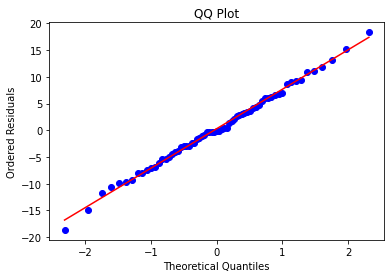

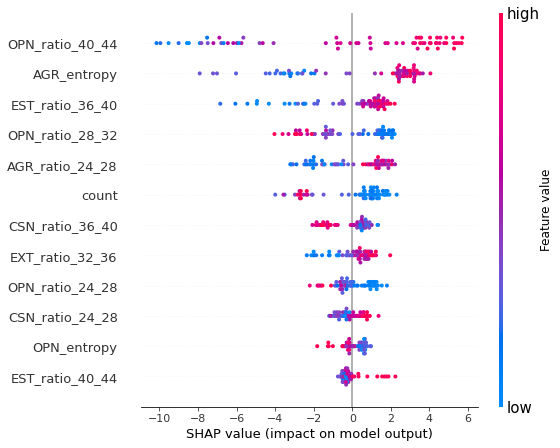

In [59]:
analysis_bf_cul('uai')

正在评估ivr
91
有效的数据数量： 91
交叉验证的MSE平均值: 388.6198522222222
交叉验证的MSE标准差: 88.89465376830948


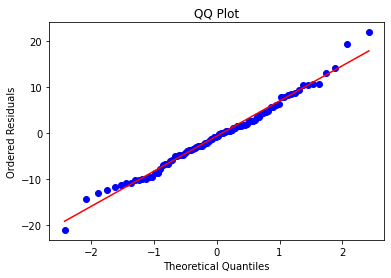

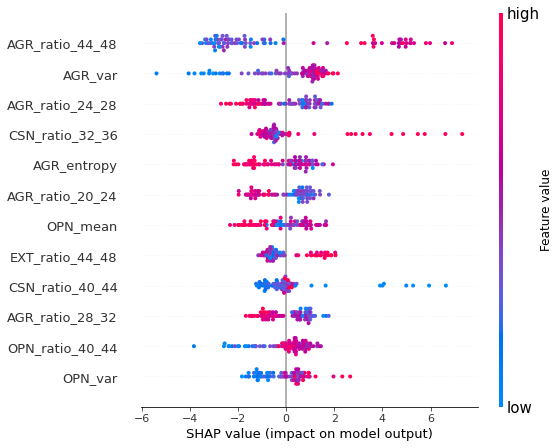

In [60]:
analysis_bf_cul('ivr')

正在评估ltowvs
90
有效的数据数量： 90
交叉验证的MSE平均值: 435.33902901960784
交叉验证的MSE标准差: 121.16302062771827


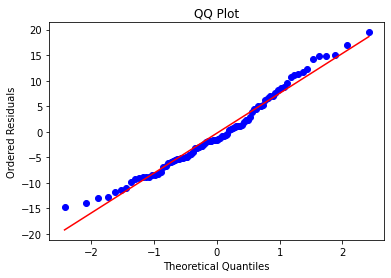

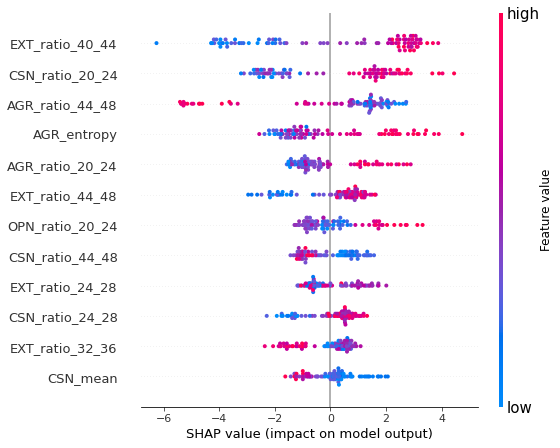

In [61]:
analysis_bf_cul('ltowvs')

In [62]:
X.columns

Index(['EXT_ratio_20_24', 'EXT_ratio_24_28', 'EXT_ratio_28_32',
       'EXT_ratio_32_36', 'EXT_ratio_36_40', 'EXT_ratio_40_44',
       'EXT_ratio_44_48', 'EST_ratio_20_24', 'EST_ratio_24_28',
       'EST_ratio_28_32', 'EST_ratio_32_36', 'EST_ratio_36_40',
       'EST_ratio_40_44', 'EST_ratio_44_48', 'AGR_ratio_20_24',
       'AGR_ratio_24_28', 'AGR_ratio_28_32', 'AGR_ratio_32_36',
       'AGR_ratio_36_40', 'AGR_ratio_40_44', 'AGR_ratio_44_48',
       'CSN_ratio_20_24', 'CSN_ratio_24_28', 'CSN_ratio_28_32',
       'CSN_ratio_32_36', 'CSN_ratio_36_40', 'CSN_ratio_40_44',
       'CSN_ratio_44_48', 'OPN_ratio_20_24', 'OPN_ratio_24_28',
       'OPN_ratio_28_32', 'OPN_ratio_32_36', 'OPN_ratio_36_40',
       'OPN_ratio_40_44', 'OPN_ratio_44_48', 'EXT_entropy', 'EST_entropy',
       'AGR_entropy', 'CSN_entropy', 'OPN_entropy', 'count', 'EXT_mean',
       'EXT_var', 'EST_mean', 'EST_var', 'AGR_mean', 'AGR_var', 'CSN_mean',
       'CSN_var', 'OPN_mean', 'OPN_var', 'anomaly_count_ratio'],
      d

In [65]:
merged_df

country        EXT        EST        AGR        CSN        OPN   pdi   idv  \
0       AR  28.341788  32.142676  36.067850  31.419150  39.660431  49.0  46.0   
1       AU  29.838577  30.166020  37.611953  33.346992  38.123166  38.0  90.0   
2       AT  29.906998  29.845147  36.772912  32.370655  40.542212  11.0  55.0   
3       BD  26.673981  31.752351  36.134796  31.940439  36.109718  80.0  20.0   
4       BE  29.956590  30.418672  37.523536  31.902458  38.970188  65.0  75.0   
..     ...        ...        ...        ...        ...        ...   ...   ...   
56      TR  29.356278  32.097544  35.848841  32.890695  39.249741  66.0  37.0   
57      US  29.818118  30.279096  38.157230  34.017163  38.816729  40.0  91.0   
58      UY  28.304843  31.128205  36.267806  31.900285  39.179487  61.0  36.0   
59      VE  28.777778  31.273016  35.196825  31.628571  39.408730  81.0  12.0   
60      VN  27.783483  31.393667  35.584938  32.126230  35.958494  70.0  20.0   

     mas    uai  ltowvs    ivr  ctr  cluster  
0   56.0   86.0    20.0   62.0  ARG        3  
1   61.0   51.0    21.0   71.0  AUS        2  
2   79.0   70.0    60.0   63.0  AUT        1  
3   55.0   60.0    47.0   20.0  BGD        4  
4   54.0   94.0    82.0   57.0  BEL        1  
..   ...    ...     ...    ...  ...      ...  
56  45.0   85.0    46.0   49.0  TUR        3  
57  62.0   46.0    26.0   68.0  USA        2  
58  38.0  100.0    26.0   53.0  URY        3  
59  73.0   76.0    16.0  100.0  VEN        3  
60  40.0   30.0    57.0   35.0  VNM        4  

[61 rows x 14 columns]

In [70]:
# dfc = pd.read_csv('../2016全球幸福指数报告数据集.csv')

# import pycountry
# name_to_a3 = {i.name: i.alpha_3 for i in pycountry.countries}
# # 定义一个函数来进行转换
# def convert_name_to_alpha3(alpha2):
#     return name_to_a3.get(alpha2, None)

# # 新增一列ctr，并应用转换函数
# dfc['ctr'] = dfc['Country'].apply(convert_name_to_alpha3)

# dfc

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              7.509                      7.428                      7.590   
2              7.501                      7.333                      7.669   
3              7.498                      7.421                      7.575   
4              7.413                      7.351                      7.475   
..               ...                        ...                        ...   
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                   0.86733  0.56624   
3                     1.57744  1.12690                   0.79579  0.59609   
4                     1.40598  1.13464                   0.81091  0.57104   
..                        ...      ...                       ...      ...   
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual   ctr  
0                          0.44453     0.36171            2.73939   DNK  
1                          0.41203     0.28083            2.69463   CHE  
2                          0.14975     0.47678            2.83137   ISL  
3                          0.35776     0.37895            2.66465   NOR  
4                          0.41004     0.25492            2.82596   FIN  
..                             ...         ...                ...   ...  
152                        0.06681     0.20180            2.10812   BEN  
153                        0.07112     0.31268            2.14558   AFG  
154                        0.11587     0.17517            2.13540   TGO  
155                        0.17233     0.48397            0.81789  None  
156                        0.09419     0.20290            2.10404   BDI  

[157 rows x 14 columns]

In [77]:
dff = pd.read_csv('2016年幸福感加地区.csv')
dff= dff.drop(columns=['Unnamed: 0'])
dff = dff.dropna(subset=['ctr'])
dff

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              7.509                      7.428                      7.590   
2              7.501                      7.333                      7.669   
3              7.498                      7.421                      7.575   
4              7.413                      7.351                      7.475   
..               ...                        ...                        ...   
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                   0.86733  0.56624   
3                     1.57744  1.12690                   0.79579  0.59609   
4                     1.40598  1.13464                   0.81091  0.57104   
..                        ...      ...                       ...      ...   
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  ctr  
0                          0.44453     0.36171            2.73939  DNK  
1                          0.41203     0.28083            2.69463  CHE  
2                          0.14975     0.47678            2.83137  ISL  
3                          0.35776     0.37895            2.66465  NOR  
4                          0.41004     0.25492            2.82596  FIN  
..                             ...         ...                ...  ...  
152                        0.06681     0.20180            2.10812  BEN  
153                        0.07112     0.31268            2.14558  AFG  
154                        0.11587     0.17517            2.13540  TGO  
155                        0.17233     0.48397            0.81789  SYR  
156                        0.09419     0.20290            2.10404  BDI  

[150 rows x 14 columns]

In [78]:
result_df = pd.merge(df1, dff, on='ctr', how='inner')
result_df = result_df[[]]
result_df

country        EXT        EST        AGR        CSN        OPN  count  \
0        AE  30.302842  31.246651  37.621692  33.916367  37.189154   3061   
1        AF  31.018519  28.259259  36.222222  34.240741  36.500000     54   
2        AL  28.575688  31.527523  36.291284  32.894495  39.850917    436   
3        AM  28.880734  32.385321  35.568807  32.798165  40.917431    109   
4        AO  25.928571  29.642857  35.071429  30.357143  39.928571     14   
..      ...        ...        ...        ...        ...        ...    ...   
143      VN  27.783483  31.393667  35.584938  32.126230  35.958494   2337   
144      YE  30.785714  32.928571  35.071429  32.785714  37.642857     14   
145      ZA  29.333511  30.138363  37.964543  34.893628  39.810717   3751   
146      ZM  27.081633  28.653061  36.775510  34.275510  38.622449     98   
147      ZW  28.155340  27.922330  37.854369  35.980583  40.048544    103   

     ctr               Country                           Region  ...  \
0    ARE  United Arab Emirates  Middle East and Northern Africa  ...   
1    AFG           Afghanistan                    Southern Asia  ...   
2    ALB               Albania       Central and Eastern Europe  ...   
3    ARM               Armenia       Central and Eastern Europe  ...   
4    AGO                Angola               Sub-Saharan Africa  ...   
..   ...                   ...                              ...  ...   
143  VNM               Vietnam                Southeastern Asia  ...   
144  YEM                 Yemen  Middle East and Northern Africa  ...   
145  ZAF          South Africa               Sub-Saharan Africa  ...   
146  ZMB                Zambia               Sub-Saharan Africa  ...   
147  ZWE              Zimbabwe               Sub-Saharan Africa  ...   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              6.573                      6.494                      6.652   
1              3.360                      3.288                      3.432   
2              4.655                      4.546                      4.764   
3              4.360                      4.266                      4.454   
4              3.866                      3.753                      3.979   
..               ...                        ...                        ...   
143            5.061                      4.991                      5.131   
144            3.724                      3.621                      3.827   
145            4.459                      4.371                      4.547   
146            4.795                      4.645                      4.945   
147            4.193                      4.101                      4.285   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.57352  0.87114                   0.72993  0.56215   
1                     0.38227  0.11037                   0.17344  0.16430   
2                     0.95530  0.50163                   0.73007  0.31866   
3                     0.86086  0.62477                   0.64083  0.14037   
4                     0.84731  0.66366                   0.04991  0.00589   
..                        ...      ...                       ...      ...   
143                   0.74037  0.79117                   0.66157  0.55954   
144                   0.57939  0.47493                   0.31048  0.22870   
145                   1.02416  0.96053                   0.18611  0.42483   
146                   0.61202  0.63760                   0.23573  0.42662   
147                   0.35041  0.71478                   0.15950  0.25429   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.35561     0.26591            2.21507  
1                          0.07112     0.31268            2.14558  
2                          0.05301     0.16840            1.92816  
3                          0.03616     0.07793            1.97864  
4           

In [87]:
result_df.columns
result_df = result_df[['EXT', 'EST', 'AGR', 'CSN', 'OPN','ctr','Happiness Score']]

In [88]:
dfcn = dfc1[['ctr1','cluster']]
dfcn.rename(columns={'ctr1':'ctr'}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [89]:
result_df = pd.merge(result_df, dfcn, on='ctr', how='inner')
result_df

EXT        EST        AGR        CSN        OPN  ctr  \
0   28.341788  32.142676  36.067850  31.419150  39.660431  ARG   
1   29.906998  29.845147  36.772912  32.370655  40.542212  AUT   
2   29.838577  30.166020  37.611953  33.346992  38.123166  AUS   
3   26.673981  31.752351  36.134796  31.940439  36.109718  BGD   
4   29.956590  30.418672  37.523536  31.902458  38.970188  BEL   
5   28.916601  31.146341  35.647522  32.337530  40.255704  BGR   
6   26.636349  31.431865  34.831225  31.128743  40.272378  BRA   
7   29.588094  30.570858  37.724587  33.607011  38.948019  CAN   
8   30.322983  29.444622  37.448784  33.179898  40.112036  CHE   
9   28.595075  31.494300  36.575011  31.431829  39.432285  CHL   
10  30.257463  29.478358  37.254478  33.103731  35.902985  CHN   
11  28.964078  31.481072  35.340149  31.462282  38.214977  COL   
12  28.538729  31.144489  35.385799  31.564052  39.449355  CZE   
13  28.719546  30.050514  36.135509  32.183966  40.864065  DEU   
14  30.874819  30.295174  37.484398  32.359398  39.345610  DNK   
15  28.437255  30.234314  35.759804  32.194118  38.748039  EST   
16  30.142772  30.232228  37.288339  32.300519  39.677117  ESP   
17  28.038479  31.012673  35.082719  31.624424  39.511751  FIN   
18  28.834337  31.237754  36.850285  31.908869  40.627502  FRA   
19  28.998408  32.857541  36.479904  32.570633  39.602467  GRC   
20  29.378860  30.876217  36.641168  32.804729  35.480389  HKG   
21  29.136303  30.439644  35.689978  32.415590  39.751002  HRV   
22  28.514608  31.088977  35.638778  31.903054  40.505976  HUN   
23  28.102019  31.480968  35.699029  32.788257  36.816767  IDN   
24  30.022740  31.105935  37.511740  32.583657  39.294509  IRL   
25  30.201704  30.570122  37.069693  33.779658  36.992510  IND   
26  29.132867  31.279720  35.885781  33.149184  38.130536  IRN   
27  29.118819  31.914646  36.663095  32.705772  39.900169  ITA   
28  29.474392  30.257113  36.005173  32.374547  37.949819  JPN   
29  29.277464  30.589454  35.494036  32.080979  38.011927  KOR   
30  27.526794  31.726612  34.266122  31.600363  38.307902  LTU   
31  29.509091  29.231818  36.181818  33.072727  39.309091  LUX   
32  28.375242  31.195358  34.363636  31.646035  39.048356  LVA   
33  26.272545  31.805611  34.993988  31.727455  39.851703  MAR   
34  28.917989  31.825397  37.150794  32.870370  39.748677  MLT   
35  29.170732  31.502331  35.246951  31.730004  38.135581  MEX   
36  28.638397  31.522149  36.049229  32.947072  34.197094  MYS   
37  30.941952  29.115278  37.697701  32.951150  39.389474  NLD   
38  29.776299  28.533765  36.306998  32.291583  37.633266  NOR   
39  30.419720  30.257004  37.276786  32.970597  37.651555  NZL   
40  29.124774  31.775166  35.164557  30.818565  37.965039  PER   
41  28.389983  31.780874  36.172167  33.993803  35.765254  PHL   
42  30.064369  31.387069  38.093990  33.961265  35.770436  PAK   
43  27.280103  32.536167  33.810904  30.957502  40.667311  POL   
44  26.903533  31.312823  36.232632  31.793966  39.527987  PRT   
45  28.819077  31.040176  35.605754  32.327372  39.854588  ROU   
46  29.284262  31.086199  36.034383  32.830508  40.583051  SRB   
47  27.982245  32.432441  34.476076  31.972013  38.646103  RUS   
48  30.350996  29.879920  36.382827  32.769847  39.597160  SWE   
49  28.362998  30.911918  36.559979  32.854150  36.246032  SGP   
50  28.581986  30.863741  35.420323  32.675520  40.103926  SVN   
51  28.595766  30.461694  35.346774  32.004032  39.804435  SVK   
52  28.370558  31.015228  35.913706  32.903553  39.233503  SLV   
53  29.626585  29.226788  35.959919  33.113648  36.332826  THA   
54  29.356278  32.097544  35.848841  32.890695  39.249741  TUR   
55  27.184211  30.892713  37.587045  34.281377  38.692308  TTO   
56  29.818118  30.279096  38.157230  34.017163  38.816729  USA   
57  28.304843  31.128205  36.267806  31.900285  39.179487  URY   
58  28.777778  31.273016  35.196825  31.628571  39.408730  VEN   
59  27.783483  31.393667  35.584938  32.126230  35

Dataset has 0 variance; skipping density estimate.


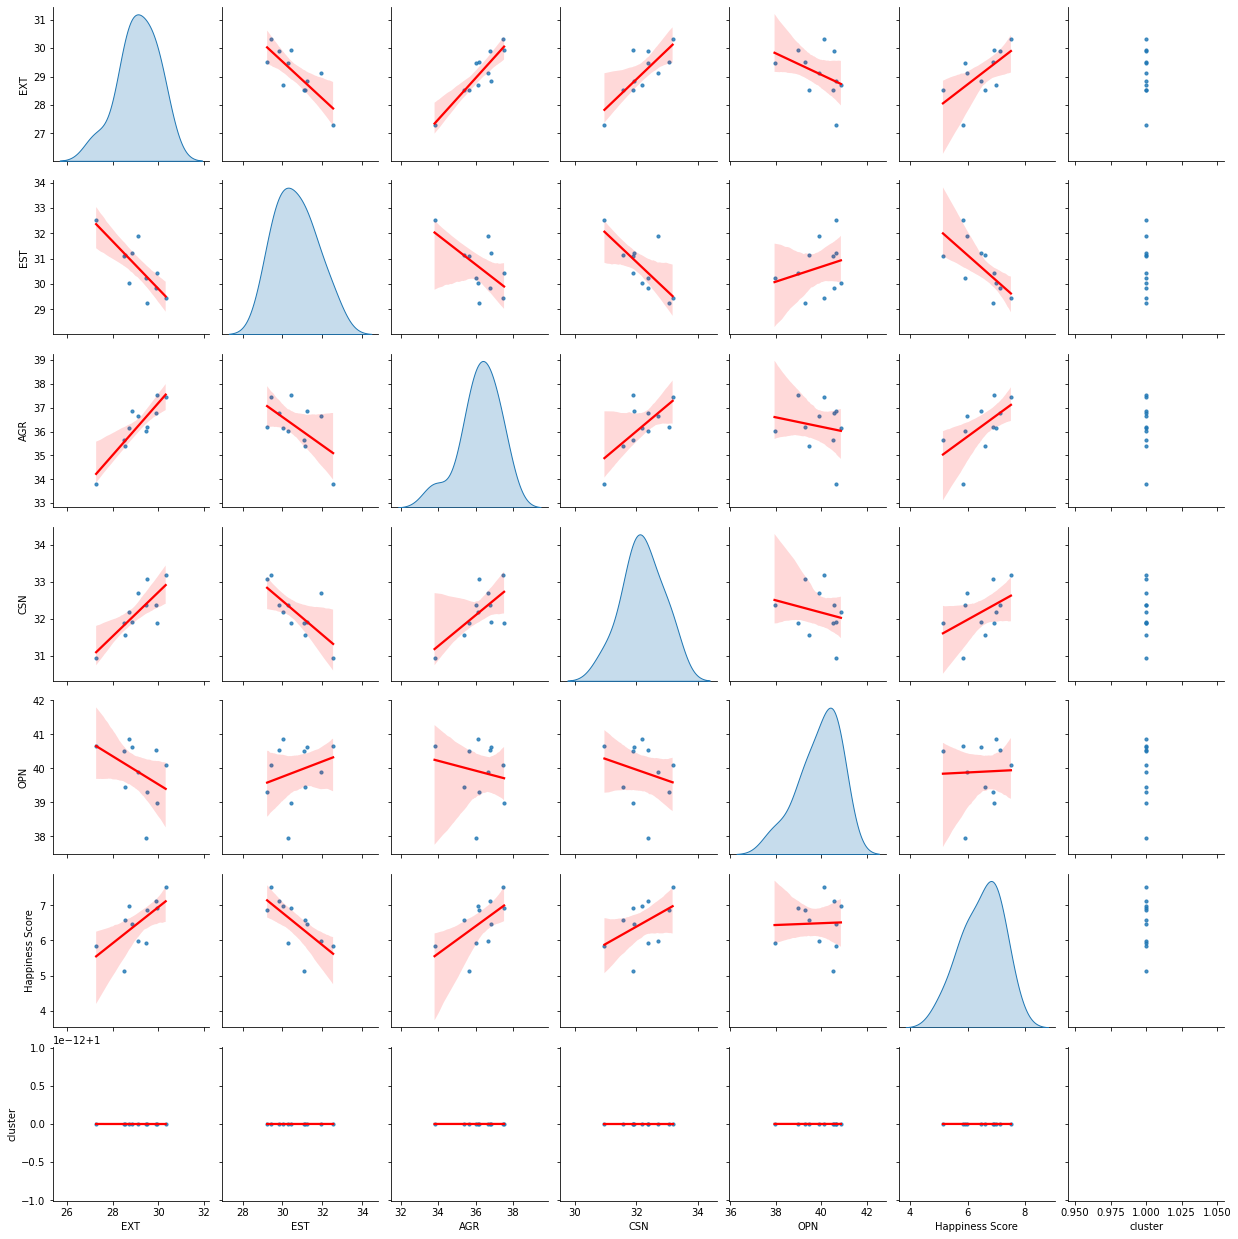

In [93]:
cluster_1_df = result_df[result_df['cluster'] == 1]
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(cluster_1_df, kind='reg', diag_kind='kde', 
             plot_kws={'scatter_kws': { 's': 10},'line_kws': {'color': 'red'},})

# 显示图形
plt.show()

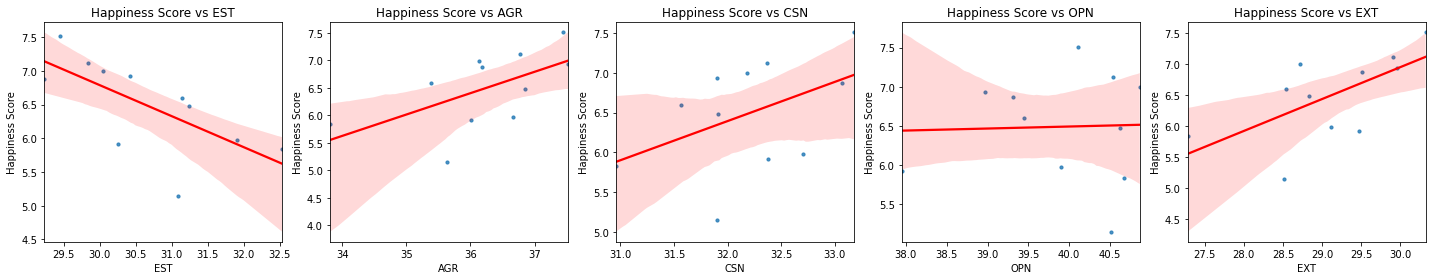

In [103]:
cluster_1_df = result_df[result_df['cluster'] == 1]

import seaborn as sns
import matplotlib.pyplot as plt

# 设置画布的尺寸
plt.figure(figsize=(20, 4))  # 宽度和高度可以根据需要调整

# 绘制 'Happiness Score' 与 'EST' 的回归图
plt.subplot(1, 5, 1)  # 1行5列的第1个位置
sns.regplot(x='EST', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EST')

# 绘制 'Happiness Score' 与 'AGR' 的回归图
plt.subplot(1, 5, 2)  # 1行5列的第2个位置
sns.regplot(x='AGR', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs AGR')

# 绘制 'Happiness Score' 与 'CSN' 的回归图
plt.subplot(1, 5, 3)  # 1行5列的第3个位置
sns.regplot(x='CSN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs CSN')

# 绘制 'Happiness Score' 与 'OPN' 的回归图
plt.subplot(1, 5, 4)  # 1行5列的第4个位置
sns.regplot(x='OPN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs OPN')

plt.subplot(1, 5, 5)  # 1行5列的第1个位置
sns.regplot(x='EXT', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EXT')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

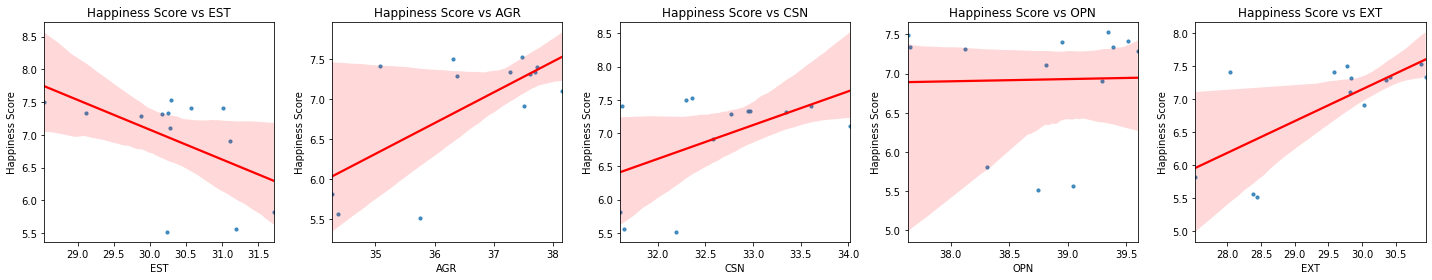

In [104]:
cluster_1_df = result_df[result_df['cluster'] == 2]

import seaborn as sns
import matplotlib.pyplot as plt

# 设置画布的尺寸
plt.figure(figsize=(20, 4))  # 宽度和高度可以根据需要调整

# 绘制 'Happiness Score' 与 'EST' 的回归图
plt.subplot(1, 5, 1)  # 1行5列的第1个位置
sns.regplot(x='EST', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EST')

# 绘制 'Happiness Score' 与 'AGR' 的回归图
plt.subplot(1, 5, 2)  # 1行5列的第2个位置
sns.regplot(x='AGR', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs AGR')

# 绘制 'Happiness Score' 与 'CSN' 的回归图
plt.subplot(1, 5, 3)  # 1行5列的第3个位置
sns.regplot(x='CSN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs CSN')

# 绘制 'Happiness Score' 与 'OPN' 的回归图
plt.subplot(1, 5, 4)  # 1行5列的第4个位置
sns.regplot(x='OPN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs OPN')

plt.subplot(1, 5, 5)  # 1行5列的第1个位置
sns.regplot(x='EXT', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EXT')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

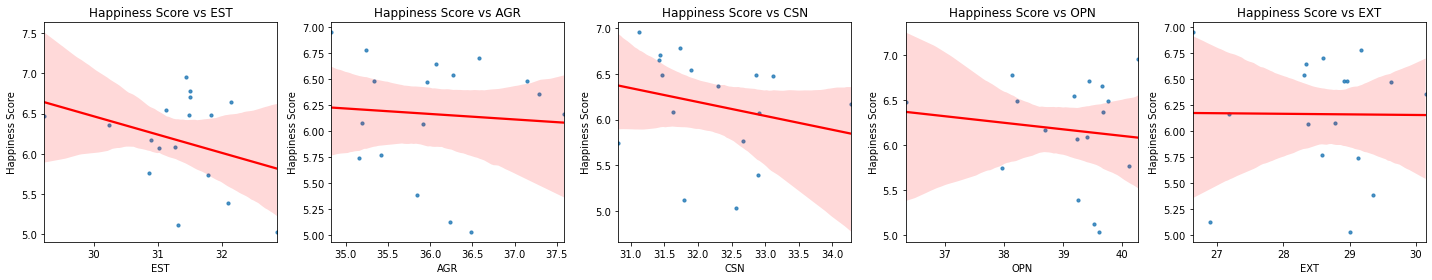

In [106]:
cluster_1_df = result_df[result_df['cluster'] == 3]

import seaborn as sns
import matplotlib.pyplot as plt

# 设置画布的尺寸
plt.figure(figsize=(20, 4))  # 宽度和高度可以根据需要调整

# 绘制 'Happiness Score' 与 'EST' 的回归图
plt.subplot(1, 5, 1)  # 1行5列的第1个位置
sns.regplot(x='EST', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EST')

# 绘制 'Happiness Score' 与 'AGR' 的回归图
plt.subplot(1, 5, 2)  # 1行5列的第2个位置
sns.regplot(x='AGR', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs AGR')

# 绘制 'Happiness Score' 与 'CSN' 的回归图
plt.subplot(1, 5, 3)  # 1行5列的第3个位置
sns.regplot(x='CSN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs CSN')

# 绘制 'Happiness Score' 与 'OPN' 的回归图
plt.subplot(1, 5, 4)  # 1行5列的第4个位置
sns.regplot(x='OPN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs OPN')

plt.subplot(1, 5, 5)  # 1行5列的第1个位置
sns.regplot(x='EXT', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EXT')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

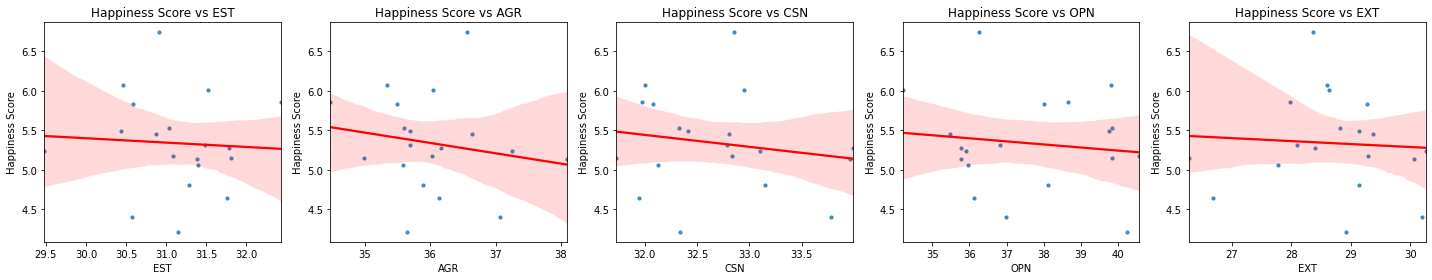

In [107]:
cluster_1_df = result_df[result_df['cluster'] == 4]

import seaborn as sns
import matplotlib.pyplot as plt

# 设置画布的尺寸
plt.figure(figsize=(20, 4))  # 宽度和高度可以根据需要调整

# 绘制 'Happiness Score' 与 'EST' 的回归图
plt.subplot(1, 5, 1)  # 1行5列的第1个位置
sns.regplot(x='EST', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EST')

# 绘制 'Happiness Score' 与 'AGR' 的回归图
plt.subplot(1, 5, 2)  # 1行5列的第2个位置
sns.regplot(x='AGR', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs AGR')

# 绘制 'Happiness Score' 与 'CSN' 的回归图
plt.subplot(1, 5, 3)  # 1行5列的第3个位置
sns.regplot(x='CSN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs CSN')

# 绘制 'Happiness Score' 与 'OPN' 的回归图
plt.subplot(1, 5, 4)  # 1行5列的第4个位置
sns.regplot(x='OPN', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs OPN')

plt.subplot(1, 5, 5)  # 1行5列的第1个位置
sns.regplot(x='EXT', y='Happiness Score', data=cluster_1_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Happiness Score vs EXT')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [111]:
result_df[result_df['cluster'] == 3]

EXT        EST        AGR        CSN        OPN  ctr  \
0   28.341788  32.142676  36.067850  31.419150  39.660431  ARG   
6   26.636349  31.431865  34.831225  31.128743  40.272378  BRA   
9   28.595075  31.494300  36.575011  31.431829  39.432285  CHL   
11  28.964078  31.481072  35.340149  31.462282  38.214977  COL   
16  30.142772  30.232228  37.288339  32.300519  39.677117  ESP   
19  28.998408  32.857541  36.479904  32.570633  39.602467  GRC   
34  28.917989  31.825397  37.150794  32.870370  39.748677  MLT   
35  29.170732  31.502331  35.246951  31.730004  38.135581  MEX   
40  29.124774  31.775166  35.164557  30.818565  37.965039  PER   
44  26.903533  31.312823  36.232632  31.793966  39.527987  PRT   
50  28.581986  30.863741  35.420323  32.675520  40.103926  SVN   
52  28.370558  31.015228  35.913706  32.903553  39.233503  SLV   
53  29.626585  29.226788  35.959919  33.113648  36.332826  THA   
54  29.356278  32.097544  35.848841  32.890695  39.249741  TUR   
55  27.184211  30.892713  37.587045  34.281377  38.692308  TTO   
57  28.304843  31.128205  36.267806  31.900285  39.179487  URY   
58  28.777778  31.273016  35.196825  31.628571  39.408730  VEN   

    Happiness Score  cluster  
0             6.650        3  
6             6.952        3  
9             6.705        3  
11            6.481        3  
16            6.361        3  
19            5.033        3  
34            6.488        3  
35            6.778        3  
40            5.743        3  
44            5.123        3  
50            5.768        3  
52            6.068        3  
53            6.474        3  
54            5.389        3  
55            6.168        3  
57            6.545        3  
58            6.084        3